In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

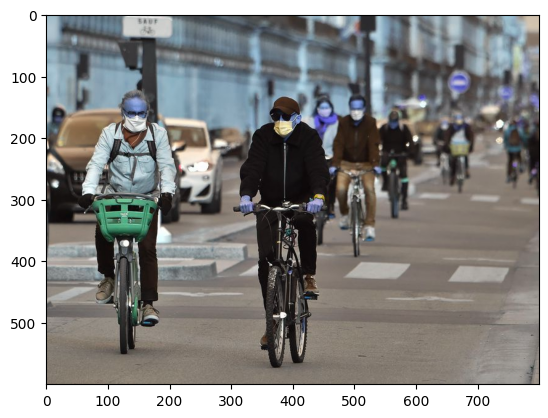

In [3]:
## Reading the test image
import cv2
test_img = cv2.imread('people_bicycles.jpg')
plt.imshow(test_img)

In [4]:
## image to blob
scalefactor=1.0/255.0
new_size=(416,416)
blob = cv2.dnn.blobFromImage(image=test_img,scalefactor=scalefactor,size=new_size,swapRB=True,crop=False)

In [5]:
blob.shape

(1, 3, 416, 416)

In [6]:
## getting the class labels
class_labels_path = 'models/coco.names'
class_labels = open(class_labels_path).read().strip().split('\n')
class_labels

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [7]:
len(class_labels)

80

In [8]:
## Bounding box definitions
## creating a list of colors
## Example: Red, Green, Blue, Yellow, Magenta
class_colors=["255,0,0","0,255,0","0,0,255","255,255,0","255,0,255"]

In [9]:
# split the array on comma-separated strings and then convert string to int
class_colors = [np.array(every_color.split(',')).astype("int") for every_color in class_colors]

In [10]:
# converting to a numpy array
class_colors=np.array(class_colors)

In [11]:
# tile this to get 80 class colors , i.e 16 times repetition along the rows and only 1 along the column
class_colors =np.tile(class_colors,(16,1))

In [12]:
## visualizing the effect of the above code
def colored(r, g, b, text):
    return "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(r, g, b, text)

line=""
for i in range(16):
    for j in range(5):
        class_id = i*5+j
        class_id_string = str(class_id)
        text = "class"+class_id_string
        colored_text = colored(class_colors[class_id][0],class_colors[class_id][1],class_colors[class_id][2],text)
        line+=colored_text
    line+="\n"
print(line)

class0 class1 class2 class3 class4 
class5 class6 class7 class8 class9 
class10 class11 class12 class13 class14 
class15 class16 class17 class18 class19 
class20 class21 class22 class23 class24 
class25 class26 class27 class28 class29 
class30 class31 class32 class33 class34 
class35 class36 class37 class38 class39 
class40 class41 class42 class43 class44 
class45 class46 class47 class48 class49 
class50 class51 class52 class53 class54 
class55 class56 class57 class58 class59 
class60 class61 class62 class63 class64 
class65 class66 class67 class68 class69 
class70 class71 class72 class73 class74 
class75 class76 class77 class78 class79 



In [13]:
## Loading the pretrained model
yolo_model=cv2.dnn.readNetFromDarknet(cfgFile='models\yolov4.cfg',darknetModel='models\yolov4.weights')

In [14]:
# Read the network layers/components.
model_layers=yolo_model.getLayerNames()
print("MODEL LAYERS:\n",model_layers)
print(f"\nModel has {len(model_layers)} components")

MODEL LAYERS:
 ('conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn_37', 'mish_38', 'conv_38',

In [15]:
output_layers = [model_layers[output_layer-1] for output_layer in yolo_model.getUnconnectedOutLayers()]
print(f"Output Layers:\n{output_layers}")

Output Layers:
['yolo_139', 'yolo_150', 'yolo_161']


In [16]:
# input pre-processed blob into the model
yolo_model.setInput(blob=blob)

In [17]:
object_detection_in_layers = yolo_model.forward(output_layers)

### Analyzing the result

In [18]:
len(object_detection_in_layers)

3

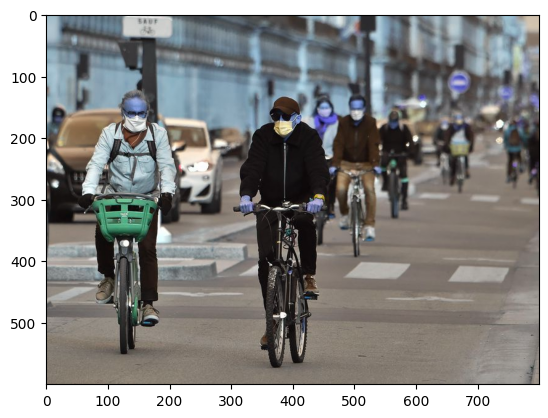

In [19]:
def object_detection_analysis(test_image, obj_detections_in_layers, confidence_threshold):

  # get the image dimensions
  img_height = test_img.shape[0]
  img_width = test_img.shape[1]

  result = test_image.copy()

  # loop over each output layer
  for object_detections_in_single_layer in obj_detections_in_layers:
    # loop over the detections in each layer
      for object_detection in object_detections_in_single_layer:
        # obj_detection[1]: bbox center pt_x
        # obj_detection[2]: bbox center pt_y
        # obj_detection[3]: bbox width
        # obj_detection[4]: bbox height
        # obj_detection[5]: confidence scores for all detections within the bbox

        # get the confidence scores of all objects detected with the bounding box
        prediction_scores = object_detection[5:]
        # consider the highest score being associated with the winning class
        # get the class ID from the index of the highest score
        predicted_class_id = np.argmax(prediction_scores)
        # get the prediction confidence
        prediction_confidence = prediction_scores[predicted_class_id]

        # consider object detections with confidence score higher than threshold
        if prediction_confidence > confidence_threshold:
            # get the predicted label
            predicted_class_label = class_labels[predicted_class_id]
            # compute the bounding box coordinates scaled for the input image
            # scaling is a multiplication of the float coordinate with the appropriate  image dimension
            bounding_box = object_detection[0:4] * np.array([img_width, img_height, img_width, img_height])
            # get the bounding box centroid (x,y), width and height as integers
            (box_center_x_pt, box_center_y_pt, box_width, box_height) = bounding_box.astype("int")
            # to get the start x and y coordinates we to subtract from the centroid half the width and half the height respectively
            # for even values of width and height of bboxes adjacent to the  image border
            #  this may generate a -1 which is prevented by the max() operator below
            start_x_pt = max(0, int(box_center_x_pt - (box_width / 2)))
            start_y_pt = max(0, int(box_center_y_pt - (box_height / 2)))
            end_x_pt = start_x_pt + box_width
            end_y_pt = start_y_pt + box_height

            # get a random mask color from the numpy array of colors
            box_color = class_colors[predicted_class_id]

            # convert the color numpy array as a list and apply to text and box
            box_color = [int(c) for c in box_color]

            # print the prediction in console
            predicted_class_label = "{}: {:.2f}%".format(predicted_class_label, prediction_confidence * 100)
            print("predicted object {}".format(predicted_class_label))

            # draw the rectangle and text in the image
            cv2.rectangle(result, (start_x_pt, start_y_pt), (end_x_pt, end_y_pt), box_color, 1)
            cv2.putText(result, predicted_class_label, (start_x_pt, start_y_pt-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 1)
  return result

confidence_threshold = 0.2
result_raw = object_detection_analysis(test_img,object_detection_in_layers, confidence_threshold)

plt.imshow(result_raw)